In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

response = requests.get("http://ergast.com/api/f1/2022/drivers.json")
pilotos = response.json()

In [2]:
pd.json_normalize(pilotos["MRData"]["DriverTable"]["Drivers"])

,driverId,permanentNumber,code,url,givenName,familyName,dateOfBirth,nationality
0,albon,23,ALB,http://en.wikipedia.org/wiki/Alexander_Albon,Alexander,Albon,1996-03-23,Thai
1,alonso,14,ALO,http://en.wikipedia.org/wiki/Fernando_Alonso,Fernando,Alonso,1981-07-29,Spanish
2,bottas,77,BOT,http://en.wikipedia.org/wiki/Valtteri_Bottas,Valtteri,Bottas,1989-08-28,Finnish
3,gasly,10,GAS,http://en.wikipedia.org/wiki/Pierre_Gasly,Pierre,Gasly,1996-02-07,French
4,hamilton,44,HAM,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis,Hamilton,1985-01-07,British
5,hulkenberg,27,HUL,http://en.wikipedia.org/wiki/Nico_H%C3%BClkenberg,Nico,Hülkenberg,1987-08-19,German
6,latifi,6,LAT,http://en.wikipedia.org/wiki/Nicholas_Latifi,Nicholas,Latifi,1995-06-29,Canadian
7,leclerc,16,LEC,http://en.wikipedia.org/wiki/Charles_Leclerc,Charles,Leclerc,1997-10-16,Monegasque
8,kevin_magnussen,20,MAG,http://en.wikipedia.org/wiki/Kevin_Magnussen,Kevin,Magnussen,1992-10-05,Danish
9,norris,4,NOR,http://en.wikipedia.org/wiki/Lando_Norris,Lando,Norris,1999-11-13,British


Creating the drivers table, setting the index and making a copy (just to be safe)

In [3]:
tabela_pontuacao = pd.json_normalize(pilotos["MRData"]["DriverTable"]["Drivers"])[["code", "permanentNumber", "driverId"]]

tabela_pontuacaoIndex = tabela_pontuacao.set_index(["code", "permanentNumber", "driverId"])

tabela_pontuacaoCopia = tabela_pontuacaoIndex

Getting the last race number (last round)

In [4]:
response = requests.get("http://ergast.com/api/f1/current/last/results.json")

ultima_corrida = response.json()

ultima_corrida = pd.json_normalize(ultima_corrida["MRData"]["RaceTable"])["round"].values[0]

Getting the points in the and of each race and joinnig in the drives table

In [5]:
for corrida in range(int(ultima_corrida)):
    corrida = corrida + 1
    response = requests.get("http://ergast.com/api/f1/2022/"+str(corrida)+"/driverStandings.json")

    pontos = response.json()


    pontos_total = pd.json_normalize(pontos["MRData"]["StandingsTable"]["StandingsLists"],
                    record_path = "DriverStandings"
                    )

    prontos_corrida = pontos_total[["Driver.driverId","points"]]

    prontos_corrida["points"] = prontos_corrida["points"].astype('int') #setting the number as int

    prontos_corrida.columns = ["driverId", corrida]  #setting the columns names as driver id and race number

    tabela_pontuacaoCopia = tabela_pontuacaoCopia.join(prontos_corrida.set_index('driverId'), on="driverId")

C:\Users\Tiago\AppData\Local\Temp\ipykernel_20316\3518480513.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prontos_corrida["points"] = prontos_corrida["points"].astype('int') #setting the number as int
C:\Users\Tiago\AppData\Local\Temp\ipykernel_20316\3518480513.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prontos_corrida["points"] = prontos_corrida["points"].astype('int') #setting the number as int
C:\Users\Tiago\AppData\Local\Temp\ipykernel_20316\3518480513.py:14: SettingWithCopyWarning: 
A

In [6]:
tabela_pontuacaoCopia

,,,1,2,3,4,5,6,7,8,9,10,11,12
code,permanentNumber,driverId,,,,,,,,,,,,
ALB,23,albon,0.0,0.0,1,1,3,3,3,3,3,3,3,3
ALO,14,alonso,2.0,2.0,2,2,2,4,10,16,18,28,29,37
BOT,77,bottas,8.0,8.0,12,24,30,38,40,40,46,46,46,46
GAS,10,gasly,0.0,4.0,6,6,6,6,6,16,16,16,16,16
HAM,44,hamilton,15.0,16.0,28,28,36,46,50,62,77,93,109,127
HUL,27,hulkenberg,0.0,0.0,0,0,0,0,0,0,0,0,0,0
LAT,6,latifi,0.0,0.0,0,0,0,0,0,0,0,0,0,0
LEC,16,leclerc,26.0,45.0,71,86,104,104,116,116,126,138,170,170
MAG,20,kevin_magnussen,10.0,12.0,12,15,15,15,15,15,15,16,22,22


Preparing the table to be transposed 

In [7]:
tabela_pontuacaoCopia_SemIndex = tabela_pontuacaoCopia.reset_index()

tabela = tabela_pontuacaoCopia_SemIndex[['driverId', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]

In [8]:
tabela.sort_values(by= 12, ascending=False)

,driverId,1,2,3,4,5,6,7,8,9,10,11,12
18,max_verstappen,0.0,25.0,25,59,85,110,125,150,175,181,208,233
7,leclerc,26.0,45.0,71,86,104,104,116,116,126,138,170,170
11,perez,0.0,12.0,30,54,66,85,110,129,129,147,151,163
14,sainz,18.0,33.0,33,38,53,65,83,83,102,127,133,144
13,russell,12.0,22.0,37,49,59,74,84,99,111,111,128,143
4,hamilton,15.0,16.0,28,28,36,46,50,62,77,93,109,127
9,norris,0.0,6.0,16,35,35,39,48,50,50,58,64,70
10,ocon,6.0,14.0,20,20,24,30,30,31,39,39,52,56
2,bottas,8.0,8.0,12,24,30,38,40,40,46,46,46,46
1,alonso,2.0,2.0,2,2,2,4,10,16,18,28,29,37


Transposing the table and setting the first line as headers

In [9]:
tabela_transposta = tabela.T

new_header = tabela_transposta.iloc[0]

tabela_transposta = tabela_transposta[1:]

tabela_transposta.columns = new_header

First plot, just a simple line plot

<AxesSubplot:>

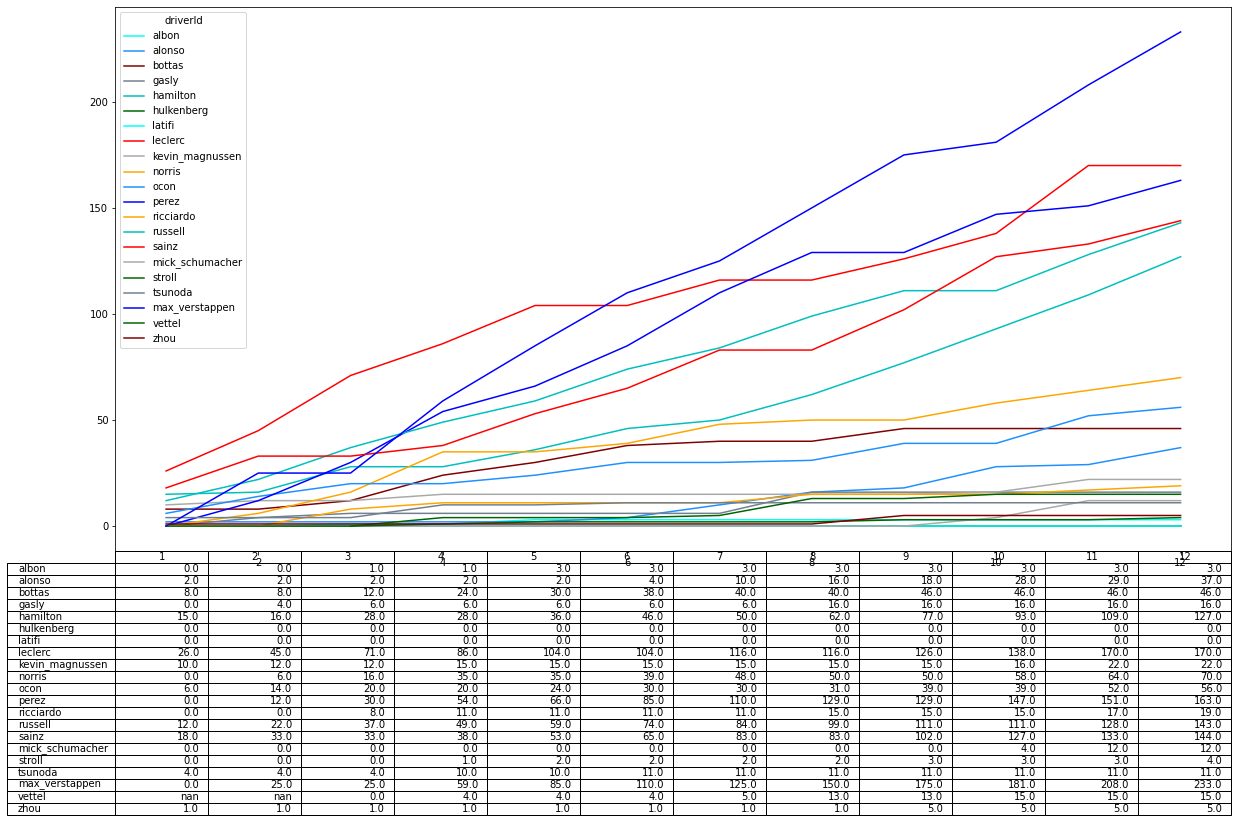

In [10]:
tabela_transposta.plot(
            figsize = (20, 10),
            color = {"albon":"aqua",
                    "alonso": "dodgerblue",
                    "bottas": "maroon",
                    "gasly": "slategray",
                    "hamilton": "c",
                    "hulkenberg": "darkgreen",
                    "latifi": "aqua",
                    "leclerc": "r",
                    "kevin_magnussen": "darkgray",
                    "norris": "orange",
                    "ocon": "dodgerblue",
                    "perez": "b",
                    "ricciardo": "orange",
                    "russell": "c",
                    "sainz": "r",
                    "mick_schumacher": "darkgray",
                    "stroll": "darkgreen",
                    "tsunoda": "slategray",
                    "max_verstappen": "b",
                    "vettel": "darkgreen",
                    "zhou":"maroon"},
                table=True
)

Just cheacking the diference between Max and Leclerc (Not related to the final plot)

In [11]:
tabela_transposta[["leclerc", "max_verstappen"]]

driverId,leclerc,max_verstappen
1,26.0,0.0
2,45.0,25.0
3,71,25
4,86,59
5,104,85
6,104,110
7,116,125
8,116,150
9,126,175
10,138,181


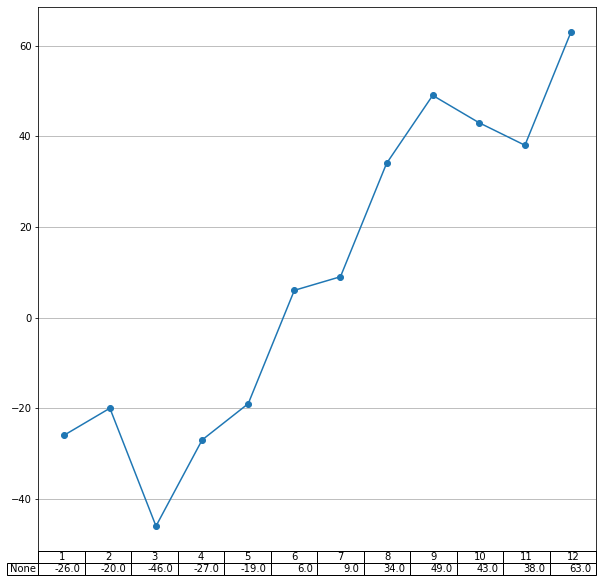

In [12]:
fig, ax = plt.subplots(1, 1)

ax.get_xaxis().set_visible(False)

(tabela_transposta["max_verstappen"] - tabela_transposta["leclerc"]).plot(table=True, ax = ax, figsize = (10, 10), marker = 'o')

plt.grid()
plt.show()

# Creating the animated bar plot

Website used as refence for this part of the project:
https://pythoninoffice.com/how-to-create-the-bar-chart-race-plot-in-python/

In [13]:
db = tabela_transposta

In [14]:
db = db.fillna(0) #Vettel got sick in the begging of the year and missed the two first races, so I'm filling the nan with zeros

db = db.astype("int64") #originaly as objects, the values must be numerics so interpolate later

In [15]:
db.dtypes #cheking the types

driverId
albon              int64
alonso             int64
bottas             int64
gasly              int64
hamilton           int64
hulkenberg         int64
latifi             int64
leclerc            int64
kevin_magnussen    int64
norris             int64
ocon               int64
perez              int64
ricciardo          int64
russell            int64
sainz              int64
mick_schumacher    int64
stroll             int64
tsunoda            int64
max_verstappen     int64
vettel             int64
zhou               int64
dtype: object

Modifying the table to make fluid transitions

In [16]:
db.index = range(0,12*10,10) #spacing the index by 10 rows

print(list(db.index))

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]


In [17]:
row_nums = [i for i in range(0,120) if i % 10 != 0]  #creating a list on fake index between the real data

empty = pd.DataFrame(np.nan, index= row_nums, columns = db.columns) #creating a NaN table using the fake index

In [18]:
expand_df = pd.concat([db, empty]).sort_index() #concatenating the real data with the NaN table
expand_df.head(11)

driverId,albon,alonso,bottas,gasly,hamilton,hulkenberg,latifi,leclerc,kevin_magnussen,norris,...,perez,ricciardo,russell,sainz,mick_schumacher,stroll,tsunoda,max_verstappen,vettel,zhou
0,0.0,2.0,8.0,0.0,15.0,0.0,0.0,26.0,10.0,0.0,...,0.0,0.0,12.0,18.0,0.0,0.0,4.0,0.0,0.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
rank_df = expand_df.rank(axis=1) #generating a ranking with the same data
rank_df.head(11)

driverId,albon,alonso,bottas,gasly,hamilton,hulkenberg,latifi,leclerc,kevin_magnussen,norris,...,perez,ricciardo,russell,sainz,mick_schumacher,stroll,tsunoda,max_verstappen,vettel,zhou
0,6.0,13.0,16.0,6.0,19.0,6.0,6.0,21.0,17.0,6.0,...,6.0,6.0,18.0,20.0,6.0,6.0,14.0,6.0,6.0,12.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
expand_df = expand_df.interpolate() #filling the emply places with interpolation
expand_df.head(11)

driverId,albon,alonso,bottas,gasly,hamilton,hulkenberg,latifi,leclerc,kevin_magnussen,norris,...,perez,ricciardo,russell,sainz,mick_schumacher,stroll,tsunoda,max_verstappen,vettel,zhou
0,0.0,2.0,8.0,0.0,15.0,0.0,0.0,26.0,10.0,0.0,...,0.0,0.0,12.0,18.0,0.0,0.0,4.0,0.0,0.0,1.0
1,0.0,2.0,8.0,0.4,15.1,0.0,0.0,27.9,10.2,0.6,...,1.2,0.0,13.0,19.5,0.0,0.0,4.0,2.5,0.0,1.0
2,0.0,2.0,8.0,0.8,15.2,0.0,0.0,29.8,10.4,1.2,...,2.4,0.0,14.0,21.0,0.0,0.0,4.0,5.0,0.0,1.0
3,0.0,2.0,8.0,1.2,15.3,0.0,0.0,31.7,10.6,1.8,...,3.6,0.0,15.0,22.5,0.0,0.0,4.0,7.5,0.0,1.0
4,0.0,2.0,8.0,1.6,15.4,0.0,0.0,33.6,10.8,2.4,...,4.8,0.0,16.0,24.0,0.0,0.0,4.0,10.0,0.0,1.0
5,0.0,2.0,8.0,2.0,15.5,0.0,0.0,35.5,11.0,3.0,...,6.0,0.0,17.0,25.5,0.0,0.0,4.0,12.5,0.0,1.0
6,0.0,2.0,8.0,2.4,15.6,0.0,0.0,37.4,11.2,3.6,...,7.2,0.0,18.0,27.0,0.0,0.0,4.0,15.0,0.0,1.0
7,0.0,2.0,8.0,2.8,15.7,0.0,0.0,39.3,11.4,4.2,...,8.4,0.0,19.0,28.5,0.0,0.0,4.0,17.5,0.0,1.0
8,0.0,2.0,8.0,3.2,15.8,0.0,0.0,41.2,11.6,4.8,...,9.6,0.0,20.0,30.0,0.0,0.0,4.0,20.0,0.0,1.0
9,0.0,2.0,8.0,3.6,15.9,0.0,0.0,43.1,11.8,5.4,...,10.8,0.0,21.0,31.5,0.0,0.0,4.0,22.5,0.0,1.0


In [21]:
rank_df = rank_df.interpolate() #doing the same with the ranking
rank_df.head(11)

driverId,albon,alonso,bottas,gasly,hamilton,hulkenberg,latifi,leclerc,kevin_magnussen,norris,...,perez,ricciardo,russell,sainz,mick_schumacher,stroll,tsunoda,max_verstappen,vettel,zhou
0,6.0,13.0,16.0,6.00,19.0,6.0,6.0,21.0,17.00,6.0,...,6.00,6.0,18.0,20.0,6.0,6.0,14.00,6.0,6.0,12.0
1,5.8,12.6,15.7,6.45,18.8,5.8,5.8,21.0,16.75,6.6,...,6.85,5.8,18.0,20.0,5.8,5.8,13.65,7.3,5.8,11.6
2,5.6,12.2,15.4,6.90,18.6,5.6,5.6,21.0,16.50,7.2,...,7.70,5.6,18.0,20.0,5.6,5.6,13.30,8.6,5.6,11.2
3,5.4,11.8,15.1,7.35,18.4,5.4,5.4,21.0,16.25,7.8,...,8.55,5.4,18.0,20.0,5.4,5.4,12.95,9.9,5.4,10.8
4,5.2,11.4,14.8,7.80,18.2,5.2,5.2,21.0,16.00,8.4,...,9.40,5.2,18.0,20.0,5.2,5.2,12.60,11.2,5.2,10.4
5,5.0,11.0,14.5,8.25,18.0,5.0,5.0,21.0,15.75,9.0,...,10.25,5.0,18.0,20.0,5.0,5.0,12.25,12.5,5.0,10.0
6,4.8,10.6,14.2,8.70,17.8,4.8,4.8,21.0,15.50,9.6,...,11.10,4.8,18.0,20.0,4.8,4.8,11.90,13.8,4.8,9.6
7,4.6,10.2,13.9,9.15,17.6,4.6,4.6,21.0,15.25,10.2,...,11.95,4.6,18.0,20.0,4.6,4.6,11.55,15.1,4.6,9.2
8,4.4,9.8,13.6,9.60,17.4,4.4,4.4,21.0,15.00,10.8,...,12.80,4.4,18.0,20.0,4.4,4.4,11.20,16.4,4.4,8.8
9,4.2,9.4,13.3,10.05,17.2,4.2,4.2,21.0,14.75,11.4,...,13.65,4.2,18.0,20.0,4.2,4.2,10.85,17.7,4.2,8.4


Setting the colors dictionaries based on the team color and generating the 3 fist frames as a test

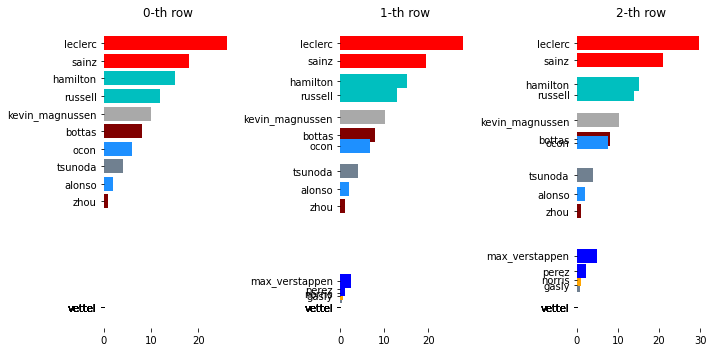

In [22]:
colors = {"albon":"aqua",
        "alonso": "dodgerblue",
        "bottas": "maroon",
        "gasly": "slategray",
        "hamilton": "c",
        "hulkenberg": "darkgreen",
        "latifi": "aqua",
        "leclerc": "r",
        "kevin_magnussen": "darkgray",
        "norris": "orange",
        "ocon": "dodgerblue",
        "perez": "b",
        "ricciardo": "orange",
        "russell": "c",
        "sainz": "r",
        "mick_schumacher": "darkgray",
        "stroll": "darkgreen",
        "tsunoda": "slategray",
        "max_verstappen": "b",
        "vettel": "darkgreen",
        "zhou":"maroon"}


num = 3
fig, axs = plt.subplots(nrows = 1, ncols = num, figsize = (10, 5), tight_layout = True)
for i, ax in enumerate(axs):
    ax.barh(y=rank_df.iloc[i].values,
            tick_label = expand_df.iloc[i].index,
            width = expand_df.iloc[i].values,
            color = [colors[i] for i in expand_df.iloc[0].index])
                
    ax.set_title(f'{i}-th row', fontsize='larger')
    [spine.set_visible(False) for spine in ax.spines.values()]  # remove chart outlines

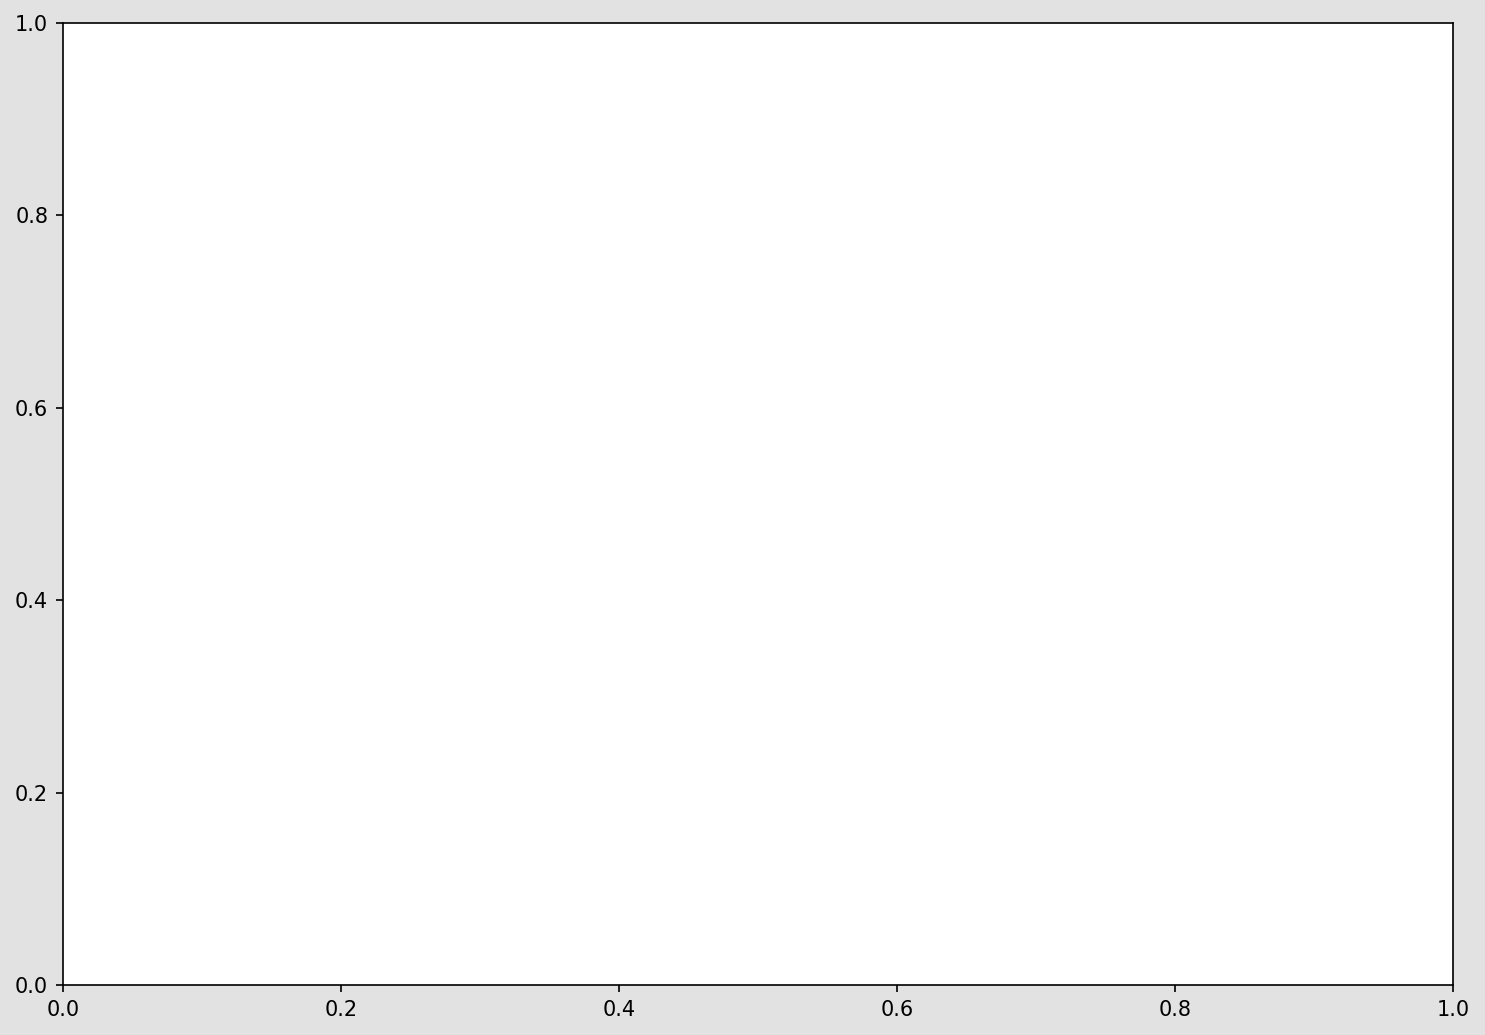

In [23]:
def update(i):
    ax.clear()
    ax.set_facecolor(plt.cm.Greys(0.2))
    [spine.set_visible(False) for spine in ax.spines.values()]
    hbars = ax.barh(y = rank_df.iloc[i].values,
           tick_label=expand_df.iloc[i].index,
           width = expand_df.iloc[i].values,
           height = 0.8,
           color = [colors[i] for i in expand_df.iloc[0].index]
           )
    ax.set_title(f'Frame: {i}')
    ax.bar_label(hbars, fmt='%.2d')
    

fig,ax = plt.subplots(figsize=(10,7),
                      facecolor = plt.cm.Greys(0.2),
                      dpi = 150,
                      tight_layout=True
                     )


data_anime = FuncAnimation(
    fig = fig,
    func = update,
    frames= len(expand_df),
    interval=100,
    repeat_delay=100
)

Exporting as a video (MP4 format)

In [24]:
data_anime.save("formula1.mp4")

Exporting as a GIF

In [25]:
data_anime.save("formula.gif")